# Explore CREG025.L75 experiments to assess the AW subduction process 
> ## This script allows to compute mean T through 3 sections:
>> ### Extreme North of the LargeFraWSC box
>> ### Fram Strait within LargeFraWSC box
>> ### Southern strait of the LargeFraWSC box

In [53]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [54]:
s_year=1980 ; e_year=2015
RYEAR=str(s_year)+'-'+str(e_year)

In [55]:
CONFIG='CREG025.L75'   ; CASE=''
CONFCASE=CONFIG

In [56]:
# List of GS± experiments names:
case_Ref='BVHNTMXD'   #; case_Ref='BCTGE27NTMX'  ;  case_Ref='BVHNTMXD'

##### Read CREG025.L75 grid information 

In [57]:
main_dir='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_byte_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    hdept         (t, y, x) float32 ...
    hdepw         (t, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  08/08/2016 13:31:30 +0200

In [58]:
ds_mask

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
Attributes:
    file_name:  mask.nc
    TimeStamp:  08/08/2016 13:41:07 +0200

In [59]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
ds_grid.coords['gphif']=(('y','x'),ds_mesh_hgr['gphif'][0,:,:])
ds_grid.coords['glamf']=(('y','x'),ds_mesh_hgr['glamf'][0,:,:])
ds_grid.coords['gphit']=(('y','x'),ds_mesh_hgr['gphit'][0,:,:])
ds_grid.coords['glamt']=(('y','x'),ds_mesh_hgr['glamt'][0,:,:])

#ds_grid['e1v3D'] = (('z','y','x'),np.tile(ds_mesh_hgr['e1v'][0,:,:].squeeze(),(75,1,1)))
#ds_grid['e1ve3v3D'] = (('z','y','x'),ds_grid['e1v3D']*ds_mesh_zgr['e3v_0'].squeeze())
ds_grid['e1t3D'] = (('z','y','x'),np.tile(ds_mesh_hgr['e1t'][0,:,:].squeeze(),(75,1,1)))
ds_grid['e1te3t3D'] = (('z','y','x'),ds_grid['e1t3D']*ds_mesh_zgr['e3t_0'].squeeze())
ds_grid['e1te3t3D']=np.squeeze(ds_grid['e1te3t3D']*ds_mask['tmask'][0,:,:,:])
ds_grid
#ds_grid['NS_Tarea']=np.tile(e1t,(e3t.shape[0],1,1))


<xarray.Dataset>
Dimensions:   (x: 528, y: 603, z: 75)
Coordinates:
    gphif     (y, x) float32 25.4716 25.471653 25.471708 ... 55.095528 55.02518
    glamf     (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit     (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    glamt     (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y, z
Data variables:
    Tarea     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Farea     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    tmask2D   (y, x) int8 ...
    e1t3D     (z, y, x) float64 2.512e+04 2.512e+04 ... 1.522e+04 1.522e+04
    e1te3t3D  (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

## Read the time series data 

In [60]:
!date

Tue Feb 12 10:09:42 UTC 2019


In [61]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_Qt_AWTmax_IceArea_massflx.nc')

In [62]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...

In [63]:
!date

Tue Feb 12 10:09:42 UTC 2019


### Read fields 

In [64]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefgT=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridT.nc',autoclose=True)
ds_RefgT

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    votemper      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    ssh           (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldkz5        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldr10_1  

In [65]:
!date

Tue Feb 12 10:10:20 UTC 2019


## Compute the T mean @ selected section from LargeFraWSC box

In [66]:
SecX=True
if SecX : 
    ds_diagsSecX=xr.Dataset()  
    # Extreme North section of the Large FraWSC box 
    SX_jloc=346 ; SX_iloc_s=311  ;  SX_iloc_e=330
     
    # Select the vertical surface of the Northern section
    ds_diagsSecX['Ref_XS_FraWSC_e1e3T']= (('z','x'),ds_grid['e1te3t3D'][:,SX_jloc,SX_iloc_s:SX_iloc_e+1])
    
    # Select the WSC northern section temperaure and velocitie
    ds_diagsSecX['Ref_XS_FraWSC_T']= (('time','z','x'),ds_RefgT['votemper'][:,:,SX_jloc,SX_iloc_s:SX_iloc_e+1])

    # Mask temperature using a 0°C temperature criteria 
    Tcrit=0.
    ds_diagsSecX['Ref_XS_FraWSC_Tmsk']=xr.where(ds_diagsSecX['Ref_XS_FraWSC_T']<Tcrit,np.nan,ds_diagsSecX['Ref_XS_FraWSC_T']*ds_diagsSecX['Ref_XS_FraWSC_e1e3T'])
    ds_diagsSecX['Ref_XS_FraWSC_Tmsk_e1te3t']=xr.where(ds_diagsSecX['Ref_XS_FraWSC_T']<Tcrit,np.nan,ds_diagsSecX['Ref_XS_FraWSC_e1e3T'])
    ds_diagsSecX['Ref_XS_FraWSC_Tmsk_mean']=ds_diagsSecX['Ref_XS_FraWSC_Tmsk'].sum(dim=('z','x'))/ \
                                            ds_diagsSecX['Ref_XS_FraWSC_Tmsk_e1te3t'].sum(dim=('z','x'))

############################################################################################################
############################################################################################################
############################################################################################################

SecN=True
if SecN : 

    ds_diagsSecN=xr.Dataset()  
    # northS_FraWSC strait location
    SN_jloc=333 ; SN_iloc_s=319  ;  SN_iloc_e=339
 
    # Select the vertical surface of the Northern section
    ds_diagsSecN['Ref_NS_FraWSC_e1e3T']= (('z','x'),ds_grid['e1te3t3D'][:,SN_jloc,SN_iloc_s:SN_iloc_e+1])
    
    # Select the WSC northern section temperaure and velocitie
    ds_diagsSecN['Ref_NS_FraWSC_T']= (('time','z','x'),ds_RefgT['votemper'][:,:,SN_jloc,SN_iloc_s:SN_iloc_e+1])

    # Mask temperature using a 0°C temperature criteria 
    Tcrit=0.
    ds_diagsSecN['Ref_NS_FraWSC_Tmsk']=xr.where(ds_diagsSecN['Ref_NS_FraWSC_T']<Tcrit,np.nan,ds_diagsSecN['Ref_NS_FraWSC_T']*ds_diagsSecN['Ref_NS_FraWSC_e1e3T'])
    ds_diagsSecN['Ref_NS_FraWSC_Tmsk_e1te3t']=xr.where(ds_diagsSecN['Ref_NS_FraWSC_T']<Tcrit,np.nan,ds_diagsSecN['Ref_NS_FraWSC_e1e3T'])
    ds_diagsSecN['Ref_NS_FraWSC_Tmsk_mean']=ds_diagsSecN['Ref_NS_FraWSC_Tmsk'].sum(dim=('z','x'))/ds_diagsSecN['Ref_NS_FraWSC_Tmsk_e1te3t'].sum(dim=('z','x'))


In [67]:
!date

Tue Feb 12 10:39:21 UTC 2019


In [68]:
if SecX: 
    ds_diagsSecX.to_netcdf('./'+case_Ref+'_y'+RYEAR+'_LargeFraWSC_XSec_TMeanTiSe.nc', unlimited_dims={'time':True})

In [69]:
if SecN: 
    ds_diagsSecN.to_netcdf('./'+case_Ref+'_y'+RYEAR+'_LargeFraWSC_NSec_TMeanTiSe.nc', unlimited_dims={'time':True})

In [70]:
!date

Tue Feb 12 10:39:22 UTC 2019


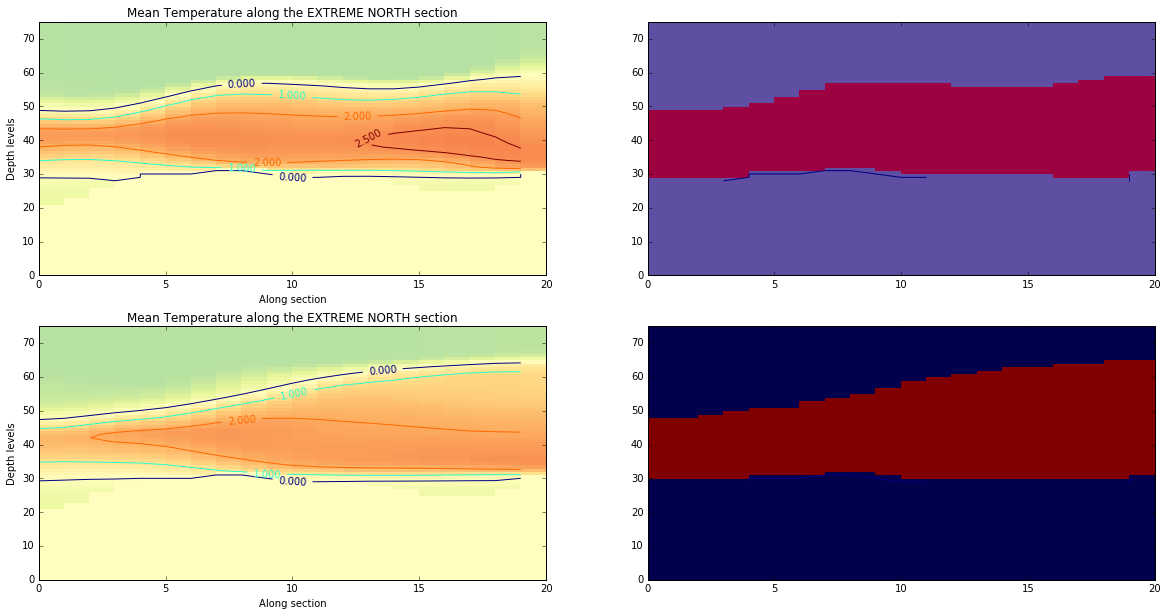

In [71]:
zctrl=True
if zctrl and SecX : 
    plt.figure(figsize=(20,10))

    plt.subplot(221)
    plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_T'][0,::-1,:],vmin=-5., vmax=5.,cmap='Spectral_r')
    C=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_T'][0,::-1,:],levels=[0.,1.,2.,2.5])
    cS=plt.clabel(C)
    plt.title('Mean Temperature along the EXTREME NORTH section')
    plt.ylabel('Depth levels')
    plt.xlabel('Along section')

    plt.subplot(222)
    plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_Tmsk'][0,::-1,:],vmin=0., vmax=5.,cmap='Spectral_r')
    plt.contour(ds_diagsSecX['Ref_XS_FraWSC_Tmsk'][0,::-1,:],'g',levels=[0.])


    plt.subplot(223)
    plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_T'][10,::-1,:],vmin=-5., vmax=5.,cmap='Spectral_r')
    C=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_T'][10,::-1,:],levels=[0.,1.,2.,2.5])
    cS=plt.clabel(C)    
    plt.title('Mean Temperature along the EXTREME NORTH section')
    plt.ylabel('Depth levels')
    plt.xlabel('Along section')

    plt.subplot(224)
    plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_Tmsk'][10,::-1,:],vmin=0., vmax=5.,cmap='seismic')
    plt.contour(ds_diagsSecX['Ref_XS_FraWSC_Tmsk'][10,::-1,:],'g',levels=[0.])


In [72]:
ds_diagsSecN

<xarray.Dataset>
Dimensions:                    (time: 432, x: 21, z: 75)
Dimensions without coordinates: time, x, z
Data variables:
    Ref_NS_FraWSC_e1e3T        (z, x) float64 1.307e+04 1.307e+04 ... 0.0 0.0
    Ref_NS_FraWSC_T            (time, z, x) float32 -1.7646059 ... nan
    Ref_NS_FraWSC_Tmsk         (time, z, x) float64 nan nan nan ... nan nan nan
    Ref_NS_FraWSC_Tmsk_e1te3t  (time, z, x) float64 nan nan nan ... 0.0 0.0 0.0
    Ref_NS_FraWSC_Tmsk_mean    (time) float64 1.926 1.872 1.813 ... 2.503 2.373

In [73]:
zctrl=False
if zctrl and SecN : 
    plt.figure(figsize=(20,10))
    sel_time=2
    plt.subplot(231)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_T'][sel_time,::-1,:],vmin=-5., vmax=5.,cmap='Spectral_r')
    C=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_T'][sel_time,::-1,:],levels=[0.,1.,2.,2.5])
    cS=plt.clabel(C)

    plt.title('Mean Temperature along the Fram section')
    plt.ylabel('Depth levels')
    plt.xlabel('Along section')

    plt.subplot(232)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_Tmsk'][sel_time,::-1,:],vmin=0., vmax=5.,cmap='Spectral_r')
    plt.contour(ds_diagsSecN['Ref_NS_FraWSC_Tmsk'][sel_time,::-1,:],'g',levels=[0.])


    plt.subplot(233)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_Tmsk'][sel_time,::-1,:],vmin=0., vmax=5.,cmap='seismic')
    plt.title('Mean Temperature along the Fram section')
    plt.ylabel('Depth levels')
    plt.xlabel('Along section')

    plt.subplot(234)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_T'][10,::-1,:],vmin=0., vmax=5.,cmap='Spectral_r')
    C=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_T'][10,::-1,:],levels=[0.,1.,2.,2.5])
    cS=plt.clabel(C)


    plt.subplot(235)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_Tmsk'][10,::-1,:],vmin=-5., vmax=5.,cmap='Spectral_r')
    plt.contour(ds_diagsSecN['Ref_NS_FraWSC_Tmsk'][10,::-1,:],'g',levels=[0.])

    plt.title('Mean Temperature along the Fram section')
    plt.ylabel('Depth levels')
    plt.xlabel('Along section')

    plt.subplot(236)
    plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_Tmsk_e1te3t'][10,::-1,:],vmin=-5., vmax=5.,cmap='seismic')

In [74]:
ds_diagsSecN

<xarray.Dataset>
Dimensions:                    (time: 432, x: 21, z: 75)
Dimensions without coordinates: time, x, z
Data variables:
    Ref_NS_FraWSC_e1e3T        (z, x) float64 1.307e+04 1.307e+04 ... 0.0 0.0
    Ref_NS_FraWSC_T            (time, z, x) float32 -1.7646059 ... nan
    Ref_NS_FraWSC_Tmsk         (time, z, x) float64 nan nan nan ... nan nan nan
    Ref_NS_FraWSC_Tmsk_e1te3t  (time, z, x) float64 nan nan nan ... 0.0 0.0 0.0
    Ref_NS_FraWSC_Tmsk_mean    (time) float64 1.926 1.872 1.813 ... 2.503 2.373

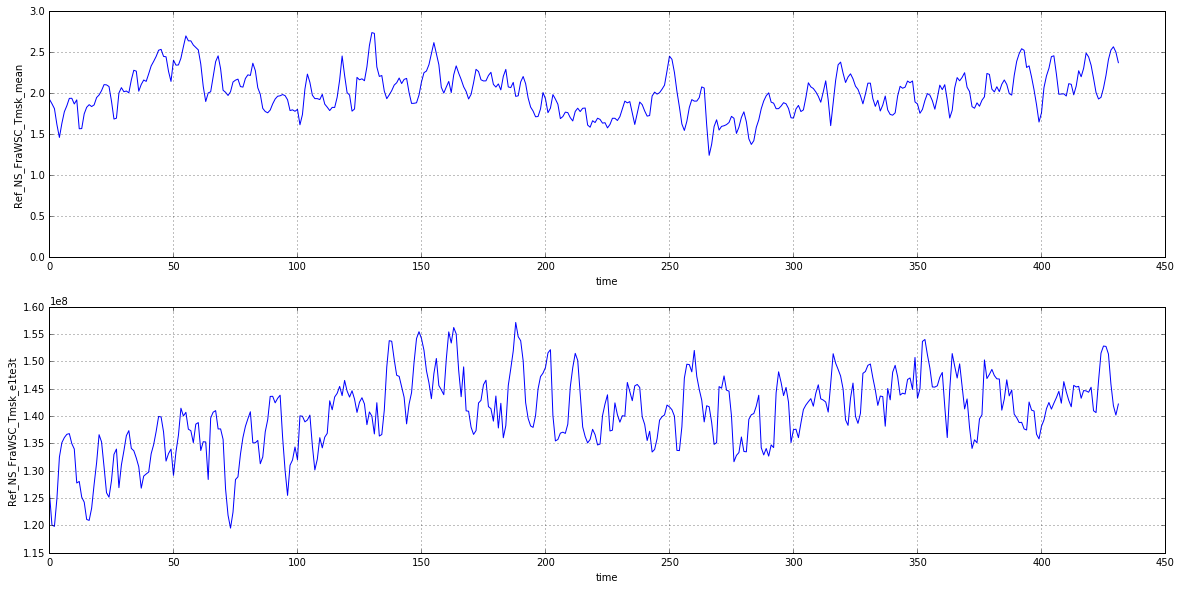

In [75]:
plt.figure(figsize=(20,15))

if SecX:
    plt.subplot(211)
    ds_diagsSecX['Ref_XS_FraWSC_Tmsk_mean'].plot()
    plt.ylim([0.,3.])
    plt.grid(True)


if SecN:
    plt.subplot(311)
    ds_diagsSecN['Ref_NS_FraWSC_Tmsk_mean'].plot()
    plt.ylim([0.,3.])
    plt.grid(True)

    plt.subplot(312)
    ds_diagsSecN['Ref_NS_FraWSC_Tmsk_e1te3t'].sum(dim=('z','x')).plot()
    plt.grid(True)



In [76]:
!date

Tue Feb 12 10:39:23 UTC 2019


In [77]:
case_Ref

'BVHNTMXD'